## SQL to get data between 2001 and 2016


In [1]:
# -- select count(DISTINCT obs.PATIENT_NUM),count(obs.PATIENT_NUM)  
# --select *
# select obs.PATIENT_NUM, obs.CONCEPT_CD,obs.START_DATE, obs.VALTYPE_CD, obs.TVAL_CHAR, obs.NVAL_NUM, con.CONCEPT_PATH, con.NAME_CHAR, pat.SEX_CD, pat.LANGUAGE_CD,pat.RACE_CD,pat.ZIP_CD
# --obs.PATIENT_NUM, con.Concept_cd
# from 
# NSF_Algorithms.dbo.observation_fact obs, NSF_Algorithms.dbo.concept_dimension con, NSF_Algorithms.dbo.patient_dimension pat
# where	
# 	obs.PATIENT_NUM in
# 		(select PATIENT_NUM from NSF_Algorithms.dbo.observation_fact
# 		where (CONCEPT_CD like '%HDID:50588%'
# 		OR
# 		CONCEPT_CD like '%HDID:2578%')
# 		--AND
# 		--CONCEPT_CD like '%RXCUI:688242%'
# 		)
# 	AND
# 		obs.CONCEPT_CD=con.CONCEPT_CD
# 	AND
# 		obs.PATIENT_NUM=pat.PATIENT_NUM
# 	AND
# 		(
# 		--con.CONCEPT_PATH like '%Testosterone%' 
# 		--OR
# 		----con.CONCEPT_PATH like '%Anti-Müllerian hormone%' 
# 		----OR
# 		con.CONCEPT_PATH like '%Luteinizing hormone%' 
# 		OR
# 		con.CONCEPT_PATH like '%Follicle Stimulating Hormone%' 
# 		OR
# 		con.CONCEPT_PATH like '%Progesterone%' 
# 		OR
# 		con.CONCEPT_PATH like '%Estrogen%' 
# 		OR		
# 		con.CONCEPT_PATH like '%fertility%' 
# 		OR
# 		con.CONCEPT_PATH like '%Family Planning%' 
# 		OR
# 		obs.CONCEPT_CD like '%HDID:50588%'
# 		OR
# 		obs.CONCEPT_CD like '%HDID:2578%'
# 		--OR
# 		--con.CONCEPT_PATH like '%pregnancy%'
# 		)
# 	AND
# 		YEAR(obs.START_DATE) between 2001 and 2016
# --	--AND
# --	--	con.CONCEPT_PATH like '%pregnancy%'
# --	AND
# --		con.CONCEPT_PATH NOT LIKE '%Diseases of male genital organs%' 
# --	AND
# --		con.CONCEPT_PATH NOT LIKE '%male infertility%'	
# --		--obs.TVAL_CHAR != 'Male infertility, unspecified' 
# 	AND
# 		pat.SEX_CD='F'
		
# --		--obs.PATIENT_NUM like '9322698'
# ----ORDER BY obs.PATIENT_NUM	

# ----INTO OUTFILE 'data2001_2016.csv'
# ----FIELDS TERMINATED BY ','
# ----ENCLOSED BY '"'
# --LINES TERMINATED BY '\n'		
		
# ----	where Concept_cd like 'ICD9:250' 
# --    where Concept_cd in (
# --    select Concept_cd from NSF_Algorithms.dbo.concept_dimension
# --    where CONCEPT_PATH like'%Genetics/fertility\Bloom lab test%')
# --	and YEAR(Start_Date) between 2007 and 2012)
# --and Concept_cd in (
# --	select Concept_cd from NSF_Algorithms.dbo.concept_dimension
# --	where CONCEPT_PATH like '%Drug Products by VA class%')
# --and YEAR(Start_Date) between 2001 and 2012


# explore related features about hormone (related with fertility and Family Planning)

In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## how many observations?

In [3]:
#df=pd.read_csv('data2001_2016.csv',nrows =10)
#df=pd.read_excel('data2001_2016.xlsx')
#hormone2001_2016
#df=pd.read_excel('FEMALE.xlsx')#pd.read_csv('FEMALE.csv')
df=pd.read_excel('pregnancy2001_2016_HDID_50588_2578.xlsx') 
df=df.sort_values(['PATIENT_NUM','START_DATE'])

# remove  duplicates

In [4]:
df=df[df.CONCEPT_CD != 'SVC:OB/GYN-FAMILY PLANNING']
df=df.drop_duplicates(subset=['PATIENT_NUM','START_DATE','CONCEPT_CD','VALTYPE_CD'])
df=df.dropna(subset=['TVAL_CHAR', 'NVAL_NUM'], how='all')
df.head()

,PATIENT_NUM,CONCEPT_CD,START_DATE,VALTYPE_CD,TVAL_CHAR,NVAL_NUM,CONCEPT_PATH,NAME_CHAR,SEX_CD,LANGUAGE_CD,RACE_CD,ZIP_CD
196271,217,HDID:50588,2013-05-16 14:00:55,T,Negative,NaN,\HDID2\Basic\Dx\Lab\Genetics/fertility\pregnan...,pregnancy test results (HDID:50588),F,DEM|LANGUAGE:engl,DEM|RACE:hispanic,2119
93151,217,HDID:2578,2013-05-19 14:30:10,T,neg,NaN,\HDID2\Basic\Dx\Lab\Chemistry\human chorionic ...,"human chorionic gonadotropin, urine, qualitati...",F,DEM|LANGUAGE:engl,DEM|RACE:hispanic,2119
81667,1029,HDID:2578,2009-07-07 13:21:26,T,neg,NaN,\HDID2\Basic\Dx\Lab\Chemistry\human chorionic ...,"human chorionic gonadotropin, urine, qualitati...",F,DEM|LANGUAGE:engl,DEM|RACE:c,2127
37797,1071,HDID:2578,2013-01-30 16:39:43,T,neg,NaN,\HDID2\Basic\Dx\Lab\Chemistry\human chorionic ...,"human chorionic gonadotropin, urine, qualitati...",F,DEM|LANGUAGE:engl,DEM|RACE:black,2122
81079,1281,HDID:2578,2005-09-05 15:43:34,T,negative,NaN,\HDID2\Basic\Dx\Lab\Chemistry\human chorionic ...,"human chorionic gonadotropin, urine, qualitati...",F,DEM|LANGUAGE:engl,DEM|RACE:black,2136


In [5]:
print(df.shape)
df.describe(include='all')
#fertility2001_2016_summary=data.describe(include='all')
#fertility2001_2016_summary.to_csv('fertility2001_2016_summary.csv')

(112578, 12)


,PATIENT_NUM,CONCEPT_CD,START_DATE,VALTYPE_CD,TVAL_CHAR,NVAL_NUM,CONCEPT_PATH,NAME_CHAR,SEX_CD,LANGUAGE_CD,RACE_CD,ZIP_CD
count,1.125780e+05,112578,112578,111163,112578,16465.000000,112578,112578,112578,112578,112578,112494.0
unique,NaN,91,102932,2,1667,NaN,91,89,1,33,13,893.0
top,NaN,HDID:2578,2012-08-17 14:43:30,T,neg,NaN,\HDID2\Basic\Dx\Lab\Chemistry\human chorionic ...,"human chorionic gonadotropin, urine, qualitati...",F,DEM|LANGUAGE:engl,DEM|RACE:black,2124.0
freq,NaN,79413,10,94698,41119,NaN,79413,79413,112578,86764,66201,10549.0
first,NaN,NaN,2001-01-01 09:06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2014-05-08 16:12:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.227827e+06,NaN,NaN,NaN,NaN,221.441897,NaN,NaN,NaN,NaN,NaN,NaN
std,2.647104e+06,NaN,NaN,NaN,NaN,3483.229881,NaN,NaN,NaN,NaN,NaN,NaN
min,2.170000e+02,NaN,NaN,NaN,NaN,-3.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.244714e+06,NaN,NaN,NaN,NaN,3.600000,NaN,NaN,NaN,NaN,NaN,NaN


## how many distinct patients?

In [6]:
len(df.PATIENT_NUM.unique())

#df.NAME_CHAR.unique()

30954

In [7]:
## drop NAN columns

# df1=df.dropna(axis=1, how='all')
# #df1.head()

# #df1.describe(include='all')

# df1.INSTANCE_NUM.unique()

In [8]:
## drop all 0 columns

# df2=df1.loc[:, (df1 != df1.ix[0]).any()] 

# fertility2001_2016_summary2=df2.describe(include='all')

# fertility2001_2016_summary2

#fertility2001_2016_summary2.to_csv('fertility2001_2016_summary2.csv')

## ignore above 2 cells

In [9]:
# df2=df
##  all high freq features by value_counts of column NAME_CHAR
df_NAME_CHAR=df.NAME_CHAR.value_counts()
df_NAME_CHAR.to_frame()

,NAME_CHAR
"human chorionic gonadotropin, urine, qualitative (urine pregnancy test) (HDID:2578)",79413
"follicle stimulating hormone, serum (HDID:149)",8529
"luteinizing hormone, serum (HDID:301)",5536
"Infertility, female, of unspecified origin",4632
pregnancy test results (HDID:50588),4028
"infertility, hx of (HDID:7177)",2754
"progesterone, serum (HDID:292)",1727
"Infertility, female, of other specified origin",960
OB/GYN-FAMILY PLANNING,901
"17-hydroxyprogesterone, serum or plasma (HDID:3232)",664


In [10]:
# sns.distplot(df.NAME_CHAR)
# plt.show()

# how many RXCUI
#### "RxNorm concept unique identifier (RXCUI): This RXCUI always designates the same concept, no matter the form of the name and no matter in what table it is found. Drugs whose names map to the same RXCUI are taken to be the same drug - identical as to ingredients, strengths, and dose forms. Conversely, drugs that differ in any of these particulars are conceptually distinct and will have different RXCUIs.
#### Clinical drug component RXCUI: An RxNorm concept unique identifier for a clinical drug. A clinical drug is a pharmaceutical product given to (or taken by) a patient with a therapeutic or diagnostic intent. In RxNorm, the name of a clinical drug combines its ingredients, strengths, and/or form."

In [11]:
# df_RXCUI=df2[df2['NAME_CHAR'].str.contains("RXCUI")]
# df_RXCUI.NAME_CHAR.value_counts().to_frame()

In [12]:
# how many unique patients have RXCUI

# len(df_RXCUI.PATIENT_NUM.unique())

In [13]:
# #df_RXCUI.PATIENT_NUM.value_counts()
# df_preg_drug=df2[df2['PATIENT_NUM'].isin(df_RXCUI.PATIENT_NUM.unique())]

# df_preg_drug=df_preg_drug.sort_values(['PATIENT_NUM','START_DATE'])

# df_preg_drug.shape
# # df_preg_drug=df_preg_drug.drop_duplicates(subset=['PATIENT_NUM','START_DATE','CONCEPT_CD','VALTYPE_CD'])
# # df_preg_drug.head()
# df_preg_drug.shape
# df_preg_drug.to_csv('df_preg_drug.csv')
# df_preg_drug.describe(include='all')

In [14]:
# how many unique patients have no RXCUI but hormone

# df_no_RXCUI=df2[~df2['NAME_CHAR'].str.contains("RXCUI")]
# len(df_no_RXCUI.PATIENT_NUM.unique())

# df_no_RXCUI.head()
# df_no_RXCUI.shape
# df_no_RXCUI.index[1]
# df_no_RXCUI=df

# remove records until the last record is HDID:2578 or HDID:50588

In [15]:
# type(patient)
# patient.dtypes


In [16]:
drop_row=[]
for id in df.PATIENT_NUM.unique():#[0:1]:
    patient=df[df.PATIENT_NUM==id]
#     print(patient)
    k=len(patient)-1#RECORD_ID
    while k!=-1: 
#         print(k)
        if (patient.iloc[k,:].CONCEPT_CD != 'HDID:2578' and patient.iloc[k,:].CONCEPT_CD != 'HDID:50588') or k == 0:
            drop_row.append(patient.index[k])#patient.iloc[k,0]
            k=k-1
        else:
            break
    
print(len(drop_row))

23558


In [17]:
df3=df.drop(drop_row)
len(df3.PATIENT_NUM.unique())
print(df3.shape)

(89020, 12)


In [18]:
df3.shape

(89020, 12)

##  all high freq features by value_counts of column CONCEPT_PATH

In [19]:
# df3=df3[df3.CONCEPT_CD != 'SVC:OB/GYN-FAMILY PLANNING']
# df3.shape

In [20]:
# df3.CONCEPT_PATH.value_counts().to_frame()#.to_dict()
#df2.concept_path.value_counts()

In [21]:
df3_CONCEPT_CD=df3.CONCEPT_CD.value_counts().to_frame()

In [22]:
df3_CONCEPT_CD[df3_CONCEPT_CD.CONCEPT_CD>35].index

Index([u'HDID:2578', u'HDID:149', u'HDID:301', u'ICD9:628.9', u'HDID:50588',
       u'HDID:7177', u'HDID:292', u'SVC:BMC:OB/GYN-FAMILY PLANNING',
       u'ICD9:628.8', u'ICD9:628.0', u'HDID:3232', u'HDID:11705',
       u'RXCUI:762001', u'ICD9:628.2', u'RXCUI:688242',
       u'INS:ZZINFERTILITY SVC', u'RXCUI:150840', u'RXCUI:890918',
       u'ICD9:628.3', u'ICD9:V26.21', u'RXCUI:206101', u'HDID:39874'],
      dtype='object')

In [23]:
df=df3[df3.CONCEPT_CD.isin(df3_CONCEPT_CD[df3_CONCEPT_CD.CONCEPT_CD>35].index)]

In [24]:
print(df.shape)
len(df.PATIENT_NUM.unique())

(88681, 12)


17052

In [25]:
len(df.PATIENT_NUM.unique())

17052

# remove record after last preg so that last record is preg and remove patient with only 1 record

In [26]:
drop_row=[]
for id in df.PATIENT_NUM.unique():#[0:1]:
    patient=df[df.PATIENT_NUM==id]
#     print(patient)
    k=len(patient)-1#RECORD_ID
    while k!=-1: 
#         print(k)
        if (patient.iloc[k,:].CONCEPT_CD != 'HDID:2578' and patient.iloc[k,:].CONCEPT_CD != 'HDID:50588') or k == 0:
            drop_row.append(patient.index[k])#patient.iloc[k,0]
            k=k-1
        else:
            break
    
print(len(drop_row))

33


In [27]:
df=df.drop(drop_row)

In [28]:
print(df.shape)
print(len(df.PATIENT_NUM.unique()))

(88648, 12)
17019


# only keep patients with at least 1 hormone record and delete patients with only preg

In [29]:
keep_patient=[]
for id in df.PATIENT_NUM.unique():#:#[0:1]:
#     patient=df[df.PATIENT_NUM==id]
    if sum(df[df.PATIENT_NUM==id].CONCEPT_CD.isin( ['HDID:149','HDID:301','HDID:292','HDID:3232']))>0:#sum(~df[df.PATIENT_NUM==id].CONCEPT_CD.isin( ['HDID:2578','HDID:50588']))>0:
        keep_patient.append(id)
    
print(len(keep_patient))

df=df[df.PATIENT_NUM.isin(keep_patient)]

3877


In [30]:
print(df.shape)

(30815, 12)


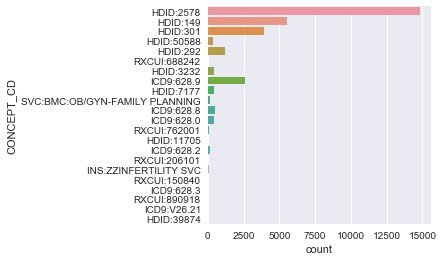

In [31]:
# df3.CONCEPT_CD.value_counts().to_frame()
plt.figure(figsize=(4,4))
sns.countplot(y="CONCEPT_CD", data=df)
plt.show()

In [32]:
df.CONCEPT_PATH.value_counts().to_frame()

,CONCEPT_PATH
"\HDID2\Basic\Dx\Lab\Chemistry\human chorionic gonadotropin, urine, qualitative (urine pregnancy test) (HDID:2578)\",14854
"\HDID2\Basic\Dx\Lab\Chemistry\follicle stimulating hormone, serum (HDID:149)\",5516
"\HDID2\Basic\Dx\Lab\Chemistry\luteinizing hormone, serum (HDID:301)\",3904
"\i2b2\Diagnoses\Genitourinary system (580-629)\Other disorders of female genital tract (617-629)\(628) Infertility, female\(628-9) Infertility, female, of u~\",2587
"\HDID2\Basic\Dx\Lab\Chemistry\progesterone, serum (HDID:292)\",1179
"\i2b2\Diagnoses\Genitourinary system (580-629)\Other disorders of female genital tract (617-629)\(628) Infertility, female\(628-8) Infertility, female, of o~\",506
"\HDID2\Basic\Hx\PMH\infertility, hx of (HDID:7177)\",442
"\HDID2\Basic\Dx\Lab\Chemistry\17-hydroxyprogesterone, serum or plasma (HDID:3232)\",429
"\i2b2\Diagnoses\Genitourinary system (580-629)\Other disorders of female genital tract (617-629)\(628) Infertility, female\(628-0) Infertility, female, asso~\",412
\HDID2\Basic\Dx\Lab\Genetics/fertility\pregnancy test results (HDID:50588)\,356


# delete irregular preg result in HDID:2578 and 'HDID:50588'

In [33]:
df.loc[df.CONCEPT_CD.isin( ['HDID:2578','HDID:50588','HDID:7177']),'TVAL_CHAR']=df[df.CONCEPT_CD.isin( ['HDID:2578','HDID:50588','HDID:7177'])].TVAL_CHAR.str.lower()

In [34]:
name2578=df[df.CONCEPT_CD.isin( ['HDID:2578','HDID:50588','HDID:7177'])].TVAL_CHAR.unique()#.str.lower().unique()
#name2578

# name2578.dtype
type(name2578)

name2578=name2578.astype(str)

# Ms') for s in name2578] 

pos_id=[i for i,item in enumerate(name2578) if "pos" in item or " po" in item]
name2578pos= name2578[pos_id]

is_pos=np.zeros(name2578.shape)#,dtype=bool
is_pos[pos_id] = True

neg_id=[i for i,item in enumerate(name2578) if "neg" in item or " ne" in item or 'neative' in item]
name2578neg=name2578[neg_id]

is_neg=np.zeros(name2578.shape)#,dtype=bool
is_neg[neg_id] = True

delete_name2578=name2578[is_pos+is_neg==0]

delete_name2578

array(['n/a', 'done', '9000 on', 'ucg: 5/19/', 'urine preg', 'xxxxx',
       'ucg:', 'hcg done n', 'ucg today', 'urine hcg', 'not evalua', 'e',
       'hyst', 'nan', 'ucg +, ucg', 'pt decline', 'less than 2',
       'not perfor', '166 on 3/2', 'bhcg: less', 'ucg: 5/13/',
       'menopausal', 'ucg: msb r', 'bhcg 1310', 's/p nsvd o', 'urine',
       'not done', 't.l.', 's/p t.l.', 'tl', 'ucg', 'pending',
       '10/2/03 do', 'ucg=+ toda', 'obgyn visi', 'finger sti', 'ucg:+ msb',
       'glucose', '+ ucg:', 'less than 5', 'no period', '-', '10/4/02.',
       '+ ucg 3/3/', 'y', '`', '+', 'uncertain', 'bhcg:2/4/0',
       'ucg 10/21/', '_ ucg msb', 'depo prove', 'serum done', 'urain preg',
       'none', 'pt. refuse'], 
      dtype='|S11')

In [35]:
df=df[~df.TVAL_CHAR.isin(delete_name2578)]#.CONCEPT_CD.unique()

# # temp=[i for i,item in enumerate(delete_name2578) if " ne" in item or 'neative' in item]
# # delete_name2578[temp]
# temp=[i for i,item in enumerate(delete_name2578) if " po" in item or 'neative' in item]
# delete_name2578[temp]
print(len(df.PATIENT_NUM.unique()))

# df.loc[np.logical_and (df.CONCEPT_CD=='HDID:2578',df['TVAL_CHAR'].isin(name2578pos)),'TVAL_CHAR']="pos" 

# df.loc[np.logical_and (df.CONCEPT_CD=='HDID:2578',df['TVAL_CHAR'].isin(name2578neg)),'TVAL_CHAR']="neg"
df.loc[df['TVAL_CHAR'].isin(name2578pos),'TVAL_CHAR']="pos" 

df.loc[df['TVAL_CHAR'].isin(name2578neg),'TVAL_CHAR']="neg"

df_preg=df.CONCEPT_CD.isin( ['HDID:2578','HDID:50588'])
df[df_preg].TVAL_CHAR.value_counts()

3877


neg    13409
pos     1489
Name: TVAL_CHAR, dtype: int64

In [37]:
df[df.CONCEPT_CD=='HDID:7177'].TVAL_CHAR.value_counts().to_frame()

,TVAL_CHAR
neg,380
pos,60


In [38]:
drop_row=df[df_preg].loc[df[df_preg].TVAL_CHAR.isnull(),:].index

# drop_row
df=df.drop(drop_row)

In [39]:
drop_row=[]
for id in df.PATIENT_NUM.unique():#[0:1]:
    patient=df[df.PATIENT_NUM==id]
#     print(patient)
    k=len(patient)-1#RECORD_ID
    while k!=-1: 
#         print(k)
        if (patient.iloc[k,:].CONCEPT_CD != 'HDID:2578' and patient.iloc[k,:].CONCEPT_CD != 'HDID:50588') or k == 0:
            drop_row.append(patient.index[k])#patient.iloc[k,0]
            k=k-1
        else:
            break
    
print(len(drop_row))

284


In [40]:
df=df.drop(drop_row)

In [41]:
print(df.shape)
print(len(df.PATIENT_NUM.unique()))

(30217, 12)
3798


In [42]:
# df

# remove record within 30 days before last preg date

In [43]:
df.columns

Index([u'PATIENT_NUM', u'CONCEPT_CD', u'START_DATE', u'VALTYPE_CD',
       u'TVAL_CHAR', u'NVAL_NUM', u'CONCEPT_PATH', u'NAME_CHAR', u'SEX_CD',
       u'LANGUAGE_CD', u'RACE_CD', u'ZIP_CD'],
      dtype='object')

In [44]:
# df.loc[:,'is_lastpreg'].sum()
# df.loc[:,'START_DATE']

# %timeit pd.to_datetime(df.loc[:,'START_DATE'], format="%Y/%m/%d %H:%M:%S")

# %timeit pd.to_datetime(df.loc[:,'START_DATE'])

# df.loc[:,'START_DATE']=pd.to_datetime(df.loc[:,'START_DATE'], format="%Y/%m/%d %H:%M:%S")

# df.loc[:,'START_DATE'].dtype

# df.loc[:,'START_DATE']


In [45]:
import datetime
# patient.START_DATE.dt.days
df.loc[:,'is_lastpreg']=0
df.loc[:,'last_preg_date']=0
# # temp=df['last_preg_date'].head()-df['START_DATE'].head()
# # # int(temp.values)<30
# # temp.dt.days<30


# patient[patient.CONCEPT_CD.isin(['HDID:2578','HDID:50588']) ].tail(1).is_lastpreg

# patient[patient.CONCEPT_CD.isin(['HDID:2578','HDID:50588']) ].tail(1).is_lastpreg.index

# df.loc[patient[patient.CONCEPT_CD.isin(['HDID:2578','HDID:50588']) ].tail(1).is_lastpreg.index,'is_lastpreg']=1

# df.loc[patient[patient.CONCEPT_CD.isin(['HDID:2578','HDID:50588']) ].tail(1).is_lastpreg.index,'is_lastpreg']

# (temp.dt.days<30 )

# # patient[patient.CONCEPT_CD.isin(['HDID:2578','HDID:50588']) ].tail(1).START_DATE.values-patient['START_DATE']
# temp=patient[patient.CONCEPT_CD.isin(['HDID:2578','HDID:50588']) ].tail(1).START_DATE.values-patient['START_DATE']
# temp.dt.days

# temp.dt.days.values

# patient.loc[patient[patient.CONCEPT_CD.isin(['HDID:2578','HDID:50588']) ].tail(1).index ,'is_lastpreg']

## The or and and python statements require truth-values. For pandas these are considered ambiguous so you should use "bitwise" | (or) or & (and) operations:
import time
start = time.time()

drop_row=[]
for id in df.PATIENT_NUM.unique():#[0:30]
#     patient=df.loc[df.PATIENT_NUM==id,['START_DATE','CONCEPT_CD','last_preg_date','is_lastpreg']]   
#     patient.loc[:,'last_preg_date']=patient[patient.CONCEPT_CD.isin(['HDID:2578','HDID:50588']) ].tail(1).START_DATE.values
    patient=df.loc[df.PATIENT_NUM==id,['START_DATE','last_preg_date','is_lastpreg']]   
    patient.loc[:,'temp']=patient.tail(1).START_DATE.values   
#     temp=patient.loc[:,'last_preg_date']-patient['START_DATE']
    patient.loc[:,'last_preg_date']=(patient.loc[:,'temp']-patient['START_DATE']).dt.days#temp.dt.days
    patient.loc[patient.tail(1).index,'is_lastpreg']=1
    df.loc[df.PATIENT_NUM==id,['last_preg_date','is_lastpreg']]=patient.loc[:,['last_preg_date','is_lastpreg']]
#     print(sum(temp.dt.days<30 and patient['is_lastpreg'].values==0))
#     print(patient)
#     df.loc[df.PATIENT_NUM==id,'last_preg_date']=patient[patient.CONCEPT_CD.isin(['HDID:2578','HDID:50588']) ].tail(1).START_DATE.values#.iloc[-1,'START_DATE']
#     df.loc[patient[patient.CONCEPT_CD.isin(['HDID:2578','HDID:50588']) ].tail(1).index,'is_lastpreg']=1
#     print(df[df.PATIENT_NUM==id])
end = time.time()
print(end - start)

54.1199998856


In [46]:
# [int(i.days) for i in (df.START_DATE - df.START_DATE)].type

# df[(df['last_preg_date']<30) & (df['is_lastpreg']==0)].last_preg_date

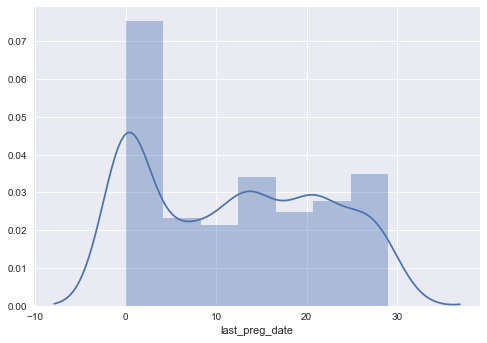

In [47]:
# sum(df['last_preg_date']<30 and df['is_lastpreg']==0)
# df[(df['last_preg_date']<30) & (df['is_lastpreg']==0)].last_preg_date.value_counts()#.to_frame()

sns.distplot(df[(df['last_preg_date']<30) & (df['is_lastpreg']==0)].last_preg_date)
plt.show()

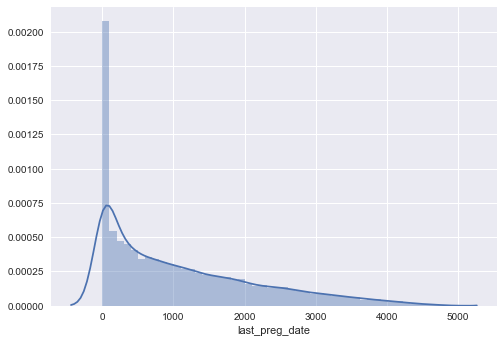

In [48]:
sns.distplot(df.last_preg_date)
plt.show()

In [49]:
df2=df[(df['last_preg_date']>30) | (df['is_lastpreg']==1)]

In [50]:
print(df2.shape)
print(len(df2.PATIENT_NUM.unique()))

(29230, 14)
3798


# only keep patients with at least 1 hormone record and delete patients with only preg

In [51]:
keep_patient=[]
for id in df2.PATIENT_NUM.unique():#:#[0:1]:
#     patient=df2[df2.PATIENT_NUM==id]
    if sum(df2[df2.PATIENT_NUM==id].CONCEPT_CD.isin( ['HDID:149','HDID:301','HDID:292','HDID:3232']))>0:#sum(~df2[df2.PATIENT_NUM==id].CONCEPT_CD.isin( ['HDID:2578','HDID:50588']))>0:
        keep_patient.append(id)
    
print(len(keep_patient))

df2=df2[df2.PATIENT_NUM.isin(keep_patient)]

3628


In [52]:
print(df2.shape)
print(len(df2.PATIENT_NUM.unique()))

(28792, 14)
3628


In [53]:
df2.CONCEPT_PATH.value_counts().to_frame()

,CONCEPT_PATH
"\HDID2\Basic\Dx\Lab\Chemistry\human chorionic gonadotropin, urine, qualitative (urine pregnancy test) (HDID:2578)\",13807
"\HDID2\Basic\Dx\Lab\Chemistry\follicle stimulating hormone, serum (HDID:149)\",5216
"\HDID2\Basic\Dx\Lab\Chemistry\luteinizing hormone, serum (HDID:301)\",3700
"\i2b2\Diagnoses\Genitourinary system (580-629)\Other disorders of female genital tract (617-629)\(628) Infertility, female\(628-9) Infertility, female, of u~\",2435
"\HDID2\Basic\Dx\Lab\Chemistry\progesterone, serum (HDID:292)\",1072
"\i2b2\Diagnoses\Genitourinary system (580-629)\Other disorders of female genital tract (617-629)\(628) Infertility, female\(628-8) Infertility, female, of o~\",466
"\HDID2\Basic\Hx\PMH\infertility, hx of (HDID:7177)\",407
"\HDID2\Basic\Dx\Lab\Chemistry\17-hydroxyprogesterone, serum or plasma (HDID:3232)\",401
"\i2b2\Diagnoses\Genitourinary system (580-629)\Other disorders of female genital tract (617-629)\(628) Infertility, female\(628-0) Infertility, female, asso~\",374
\HDID2\Basic\Dx\Lab\Genetics/fertility\pregnancy test results (HDID:50588)\,320


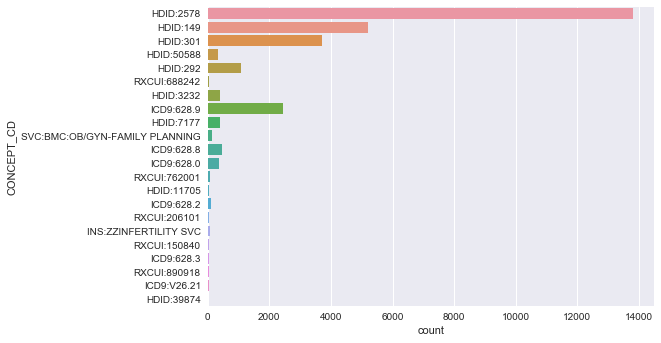

In [54]:
# sns.distplot(df2.head().CONCEPT_PATH)
sns.countplot(y="CONCEPT_CD", data=df2)
plt.show()

In [55]:
df2.describe(include='all')

,PATIENT_NUM,CONCEPT_CD,START_DATE,VALTYPE_CD,TVAL_CHAR,NVAL_NUM,CONCEPT_PATH,NAME_CHAR,SEX_CD,LANGUAGE_CD,RACE_CD,ZIP_CD,is_lastpreg,last_preg_date
count,2.879200e+04,28792,28792,28622,28792,10065.000000,28792,28792,28792,28792,28792,28792.0,28792.000000,28792.000000
unique,NaN,22,24314,2,203,NaN,22,22,1,23,12,257.0,NaN,NaN
top,NaN,HDID:2578,2010-08-23 15:26:00,T,neg,NaN,\HDID2\Basic\Dx\Lab\Chemistry\human chorionic ...,"human chorionic gonadotropin, urine, qualitati...",F,DEM|LANGUAGE:engl,DEM|RACE:black,2124.0,NaN,NaN
freq,NaN,13807,5,18557,13072,NaN,13807,13807,28792,21847,17888,2654.0,NaN,NaN
first,NaN,NaN,2001-01-01 10:53:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2014-05-07 15:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.820178e+06,NaN,NaN,NaN,NaN,24.597188,NaN,NaN,NaN,NaN,NaN,NaN,0.126007,1156.377119
std,2.266451e+06,NaN,NaN,NaN,NaN,342.442956,NaN,NaN,NaN,NaN,NaN,NaN,0.331863,1087.603465
min,3.136000e+03,NaN,NaN,NaN,NaN,-3.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,1.215942e+06,NaN,NaN,NaN,NaN,3.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,231.000000


In [56]:
#df3[df3.CONCEPT_CD=='SVC:OB/GYN-FAMILY PLANNING']

#df3[df3.CONCEPT_CD=='SVC:BMC:OB/GYN-FAMILY PLANNING']

## most patients have 1 obs but some have dozens

In [57]:
# df.PATIENT_NUM.value_counts()

# sum(df.PATIENT_NUM.value_counts()==2)

# df.PATIENT_NUM.value_counts().to_frame().describe()

# df[df.PATIENT_NUM==4157307]

#df.to_csv('df_preg_hormone.csv')

In [58]:
print(df2.shape)
print(len(df2.PATIENT_NUM.unique()))

(28792, 14)
3628


In [59]:
# df2=df2.dropna(subset=['TVAL_CHAR', 'NVAL_NUM'], how='all')

# print(df2.shape)
# print(len(df2.PATIENT_NUM.unique()))

In [60]:
# df2

In [61]:
df2.to_csv('df_preg_hormone_drug.csv', index=False)

## why some patients have more obs

In [62]:
#1104558     
df[df.PATIENT_NUM==1104558]

,PATIENT_NUM,CONCEPT_CD,START_DATE,VALTYPE_CD,TVAL_CHAR,NVAL_NUM,CONCEPT_PATH,NAME_CHAR,SEX_CD,LANGUAGE_CD,RACE_CD,ZIP_CD,is_lastpreg,last_preg_date
146603,1104558,HDID:2578,2004-01-15 10:49:24,T,neg,NaN,\HDID2\Basic\Dx\Lab\Chemistry\human chorionic ...,"human chorionic gonadotropin, urine, qualitati...",F,DEM|LANGUAGE:engl,DEM|RACE:black,2119,0,3652
138603,1104558,HDID:2578,2006-06-09 15:54:17,T,neg,NaN,\HDID2\Basic\Dx\Lab\Chemistry\human chorionic ...,"human chorionic gonadotropin, urine, qualitati...",F,DEM|LANGUAGE:engl,DEM|RACE:black,2119,0,2776
103397,1104558,HDID:2578,2007-06-19 10:18:22,T,neg,NaN,\HDID2\Basic\Dx\Lab\Chemistry\human chorionic ...,"human chorionic gonadotropin, urine, qualitati...",F,DEM|LANGUAGE:engl,DEM|RACE:black,2119,0,2401
120733,1104558,HDID:2578,2007-12-19 11:54:44,T,neg,NaN,\HDID2\Basic\Dx\Lab\Chemistry\human chorionic ...,"human chorionic gonadotropin, urine, qualitati...",F,DEM|LANGUAGE:engl,DEM|RACE:black,2119,0,2218
156205,1104558,HDID:2578,2008-06-19 15:01:57,T,neg,NaN,\HDID2\Basic\Dx\Lab\Chemistry\human chorionic ...,"human chorionic gonadotropin, urine, qualitati...",F,DEM|LANGUAGE:engl,DEM|RACE:black,2119,0,2035
64205,1104558,HDID:2578,2008-08-01 11:10:58,T,pos,NaN,\HDID2\Basic\Dx\Lab\Chemistry\human chorionic ...,"human chorionic gonadotropin, urine, qualitati...",F,DEM|LANGUAGE:engl,DEM|RACE:black,2119,0,1992
78577,1104558,HDID:2578,2008-08-29 13:35:52,T,pos,NaN,\HDID2\Basic\Dx\Lab\Chemistry\human chorionic ...,"human chorionic gonadotropin, urine, qualitati...",F,DEM|LANGUAGE:engl,DEM|RACE:black,2119,0,1964
156207,1104558,HDID:2578,2008-10-31 15:25:28,T,pos,NaN,\HDID2\Basic\Dx\Lab\Chemistry\human chorionic ...,"human chorionic gonadotropin, urine, qualitati...",F,DEM|LANGUAGE:engl,DEM|RACE:black,2119,0,1901
172005,1104558,HDID:2578,2008-11-28 14:50:08,T,pos,NaN,\HDID2\Basic\Dx\Lab\Chemistry\human chorionic ...,"human chorionic gonadotropin, urine, qualitati...",F,DEM|LANGUAGE:engl,DEM|RACE:black,2119,0,1873
112037,1104558,HDID:2578,2008-12-19 13:26:09,T,pos,NaN,\HDID2\Basic\Dx\Lab\Chemistry\human chorionic ...,"human chorionic gonadotropin, urine, qualitati...",F,DEM|LANGUAGE:engl,DEM|RACE:black,2119,0,1852


In [63]:
# patient with RXCUI

In [64]:
# patient without RXCUI